In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_csv(r"C:\Users\vaibh\Desktop\ProbabilityofDefault\cs-training.csv")
test_data =pd.read_csv(r"C:\Users\vaibh\Desktop\ProbabilityofDefault\cs-test.csv")


In [ ]:
sns.pairplot(train_data)
plt.show()

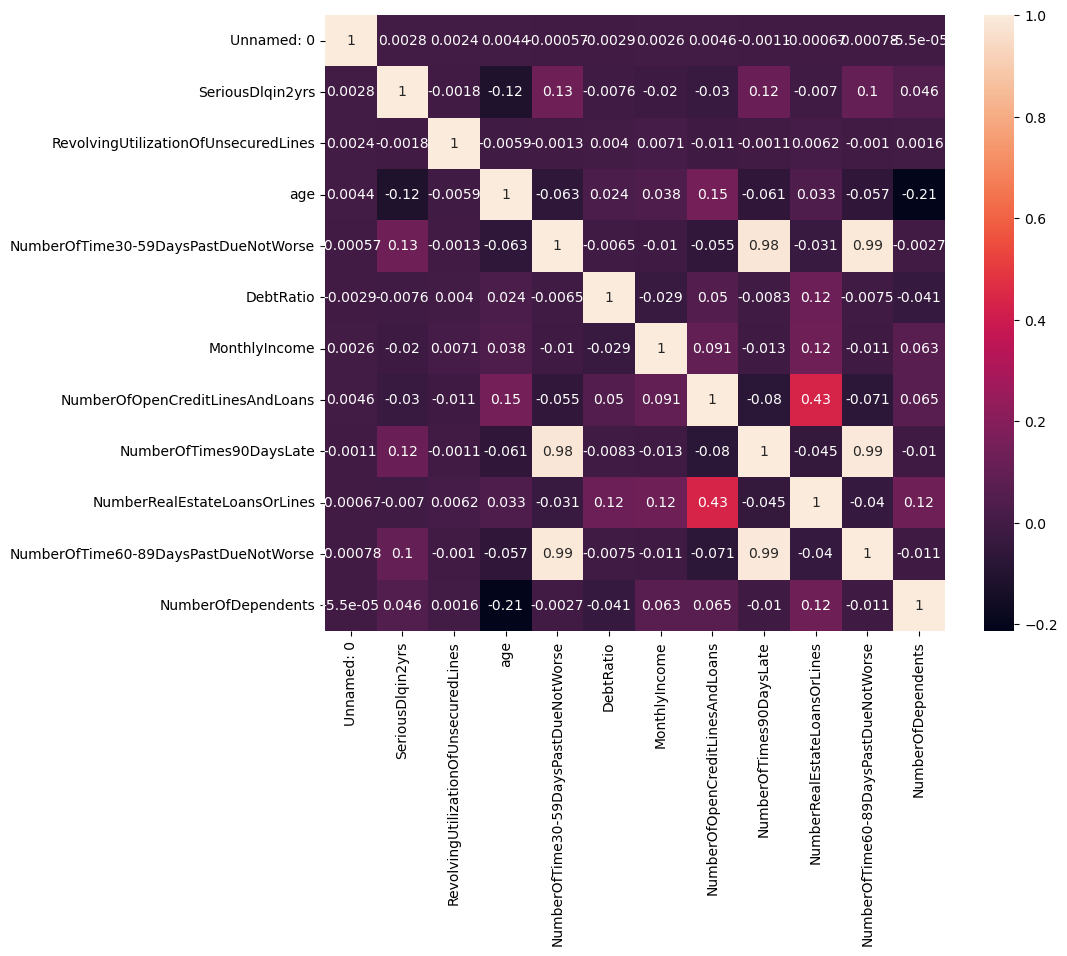

In [4]:
corr_matrix = train_data.corr()

# create a figure with a custom size
fig, ax = plt.subplots(figsize=(10, 8))

# create the heatmap
sns.heatmap(corr_matrix, annot=True, ax=ax)

plt.show()

In [5]:
nan_percentages = train_data.isna().mean().round(4)*100
print(nan_percentages)

Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.82
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.62
dtype: float64


In [6]:
# Fill in missing values with the median of the column
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].median())
train_data['NumberOfDependents'] = train_data['NumberOfDependents'].fillna(train_data['NumberOfDependents'].median())

In [7]:
# Fill in missing values with the median of the column
test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(test_data['MonthlyIncome'].median())
test_data['NumberOfDependents'] = test_data['NumberOfDependents'].fillna(test_data['NumberOfDependents'].median())

In [8]:
# Define feature matrix and target vector for training data
X_train = train_data[['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']]
y_train = train_data['SeriousDlqin2yrs']

In [9]:
# Define feature matrix for test data
X_test = test_data[['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']]

In [10]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train logistic regression model
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
# Make predictions on test data
y_pred = clf.predict_proba(X_test)

In [13]:
print(y_pred)

[[0.94130063 0.05869937]
 [0.94867968 0.05132032]
 [0.95300654 0.04699346]
 ...
 [0.97199362 0.02800638]
 [0.97748679 0.02251321]
 [0.92027291 0.07972709]]


In [14]:
prob_default = y_pred[:, 1]



In [15]:
# Create a DataFrame with an index column and a probability of default column
result = pd.DataFrame({'Index': range(len(prob_default)), 'ProbabilityOfDefault': prob_default})

# Save the result to a CSV file
result.to_csv('probab_default.csv', index=False)

In [16]:
y_test = test_data['SeriousDlqin2yrs']

In [17]:
print(y_test[y_test.isna()])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
101498   NaN
101499   NaN
101500   NaN
101501   NaN
101502   NaN
Name: SeriousDlqin2yrs, Length: 101503, dtype: float64


In [18]:
# Estimate the accuracy of the model using 5-fold cross-validation
accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()

# Display the result
print(f'Estimated accuracy: {accuracy:.2f}')

Estimated accuracy: 0.93
